# Let's get Recht!


- Erik Peterson
- Guest lecture: Neural and cognitive models of adaptive decisions (CMU 85435)
- 11/27/2018

# Me!

- Research fellow @ CMU (CoAxLab, Los Angeles Division).
- Neuroscience
    - Cognition
    - Dynamics/Circuits
- AI (Multi-agent RL)
- Applied math (nonlin. dynamics, game theory)
- _Prev_: Mol. Bio, Biophysics, Chemistry, Nanotech/Surface sci.

# Today

- Reinforcement, in review
- States, and other formal debris
- Deep and convoluted functions
- Let's get Recht!
- Amoral learning?

# RL, in review

$$ \max \mathbb{E} \ R_t $$

# RL, in review

* **Q-update**: $$Q(a_i) \leftarrow  Q(a_i) + \alpha (r_t - Q(a_i))$$

* **Softmax policy**: $$\pi(a_i) = \frac{e^{\beta Q(a_i)}}{\sum_j^N e^{\beta Q(a_j)}}$$

# Pacman world

![pacman](pacman.png)

# Stateful RL

* **Q-update**: $$Q(s, a_i) \leftarrow  Q(s, a_i) + \alpha (r_t - Q(s, a_i))$$

* **Softmax policy**: $$\pi(s, a_i) = \frac{e^{\beta Q(a, a_i)}}{\sum_j^N e^{\beta Q(a, a_j)}}$$

# States

- $$s$$

![pacman](state_pacman.png)

# Markov states

- It only matters where we are now, not where we've been.

$$s \rightarrow s'$$

![pacman](state_pacman2.png)

# Non-markov states

- Your path in life actually matters.

$$\sum^T S \rightarrow s'\text{, where} \ S = \{s_0, s_1, s_2, ..., s_t\}$$

![pacman](nonstate_pacman.png)

# Real world

![pacman](not_pacman.png)

# Real world

![pacman](one_point_pacman.png)

# Stateful Q learning

* **Q-update**: $$Q(s, a_i) \leftarrow  Q(s, a_i) + \alpha (\gamma \ \text{max} \ Q(s_i, a) - Q(s, a_i))$$

* **Softmax policy**: $$\pi(s, a_i) = \frac{e^{\beta Q(a, a_i)}}{\sum_j^N e^{\beta Q(a, a_j)}}$$

- By **Bellman's Eq.**

# States, approximately

- For 'simple' problems, $s$ is simple. 
- For big (high $d$) problems it is not.  
- For ~25 years a big open problem in RL was state approximation - $f(s)$.
    
    $$Q(s,a) \rightarrow Q(f(s),a) $$
    
- To see why....

# Let's go gambling!

- 2 armed bandit, with one state 
- 'yellow'

![2_armed_bandit](images/images.001.png)

Q(s, a) table:

| State    | Action | Value |
| -----    | ------ | ----- |
|  yellow  |    1   |  ?    |
|  yellow  |    2   |  ?    |

- Size: 2

- 2 armed bandit, with 'yellow' or 'blue' states.
- State changes the reward probability.
- Imagine that the state of each bandit is randomly defined on each trial.

![2_armed_bandit](images/images.002.png)

Q(s, a) table:

|  State            | Action | Value |
|  -----            | ------ | ----- |
|  (yellow, yellow) |    1   |  ?    |
|  (yellow, blue)   |    1   |  ?    |
|  (blue, yellow)   |    1   |  ?    |
|  (blue, blue)     |    1   |  ?    |
|  (yellow, blue)   |    2   |  ?    |
|  (yellow, blue)   |    2   |  ?    |
|  (blue, yellow)   |    2   |  ?    |
|  (blue, blue)     |    2   |  ?    |

- Size: 8

- 2 armed bandit, with 'yellow' or 'blue' or 'red' states.

![2_armed_bandit](images/images.003.png)

Three state Q(s, a) table:

|  State                     | Action | Value |
|  -----                     | ------ | ----- |
|  (yellow, yellow, yellow)  |    1   |   ?   |
|  (yellow, yellow, blue)    |    1   |   ?   |
|  (yellow, yellow, red)     |    1   |   ?   |
|  (yellow, blue, blue)      |    1   |   ?   |
|  (yellow, red, red)        |    1   |   ?   |
|  (yellow, red, blue)       |    1   |   ?   |
|  (yellow, blue, red)       |    1   |   ?   |
|  (yellow, blue, blue)      |    1   |   ?   |
|  (blue, yellow, yellow)    |    1   |   ?   |
|  (blue, yellow, blue)      |    1   |   ?   |
|  (blue, yellow, red)       |    1   |   ?   |
|  (blue, blue, blue)        |    1   |   ?   |
|  (blue, red, red)          |    1   |   ?   |
|  (blue, red, blue)         |    1   |   ?   |
|  (blue, blue, red)         |    1   |   ?   |
|  (blue, blue, blue)        |    1   |   ?   |
|  (red, yellow, yellow)     |    1   |   ?   |
|  (red, yellow, blue)       |    1   |   ?   |
|  (red, yellow, red)        |    1   |   ?   |
|  (red, blue, blue)         |    1   |   ?   |
|  (red, red, red)           |    1   |   ?   |
|  (red, red, blue)          |    1   |   ?   |
|  (red, blue, red)          |    1   |   ?   |
|  (red, blue, blue)         |    1   |   ?   |
|  (yellow, yellow, yellow)  |    2   |   ?   |
|  (yellow, yellow, blue)    |    2   |   ?   |
|  (yellow, yellow, red)     |    2   |   ?   |
|  (yellow, blue, blue)      |    2   |   ?   |
|  (yellow, red, red)        |    2   |   ?   |
|  (yellow, red, blue)       |    2   |   ?   |
|  (yellow, blue, red)       |    2   |   ?   |
|  (yellow, blue, blue)      |    2   |   ?   |
|  (blue, yellow, yellow)    |    2   |   ?   |
|  (blue, yellow, blue)      |    2   |   ?   |
|  (blue, yellow, red)       |    2   |   ?   |
|  (blue, blue, blue)        |    2   |   ?   |
|  (blue, red, red)          |    2   |   ?   |
|  (blue, red, blue)         |    2   |   ?   |
|  (blue, blue, red)         |    2   |   ?   |
|  (blue, blue, blue)        |    2   |   ?   |
|  (red, yellow, yellow)     |    2   |   ?   |
|  (red, yellow, blue)       |    2   |   ?   |
|  (red, yellow, red)        |    2   |   ?   |
|  (red, blue, blue)         |    2   |   ?   |
|  (red, red, red)           |    2   |   ?   |
|  (red, red, blue)          |    2   |   ?   |
|  (red, blue, red)          |    2   |   ?   |
|  (red, blue, blue)         |    2   |   ?   |

- Size: 32
- Exponential growth!

- But Bandits are aimple and boring...

## Let's Breakout!

![breakour](breakout.gif)

- Minh et al (2015).

# Pixels as state?

- How many states in a game of breakout?
 $$ 1 \ \text{pixel} \ \rightarrow 1 d$$
- With an 84 x 84 pixel screen:
 $$ 7056 \ \text{pixel} \ \rightarrow 7056 d$$
- 256 colors / pixel
$$d^n =$$ $$17021368096888480849438963727106255152710518015137419401876312902022780344006724008816905555202069915699269197883733421544568866695922821507369024474136213708326503198859312965617233302920404859072987736333911601808130206239705193227756174863836760536091843897115565965084522775362278348807984153399293111263647996132242387087707173633320866755953016564472804617132892867783879263946490994000835774697149316606840987240359347679416573926028841247517132583785951150756323747657506027193630518581571490129949182447746765514483875093881104514749871286784599974488671130869921129196157447886961112810595455828338889794602735110097567469616609717792198800484508411597122702118374783443529884068461523365040943440832032131255930853264523174943001690958657805435049342255075016753618440141053011735699858581542099229232079690204462505268137030421807316736955773064156237336039979560311859234311116117571337259716054222996610581189818367673327119506587793178849813310607129244390975504390291456$$

- Size: $10^{988}$ states.
- (There are $10^{78} - 10^{82}$ atoms in the universe.)

## Big is hard!

- For ~25 years RL stalled on high $d$ problems. 

# functions, approximately

- Need to squish down $d$.
- Find a function $f$ that learns to group similar states $s$ into a shared $\bar{s}$.
- How to find $f$?
- By hand? 
    - VERY time consuming.
    - Solutions don't generalize.

# Deep and convoluted functions

- CNNs (somehow) __automatically__ discover $f$
- Minh _et al_ (2015)
  - $\ f : \text{DQN}$ (Deep Q Network).
  - Experience replay memory.

![DQN](DQN.png)

- Tested the DQN on 49 classic atari games
- https://gym.openai.com/envs/#atari

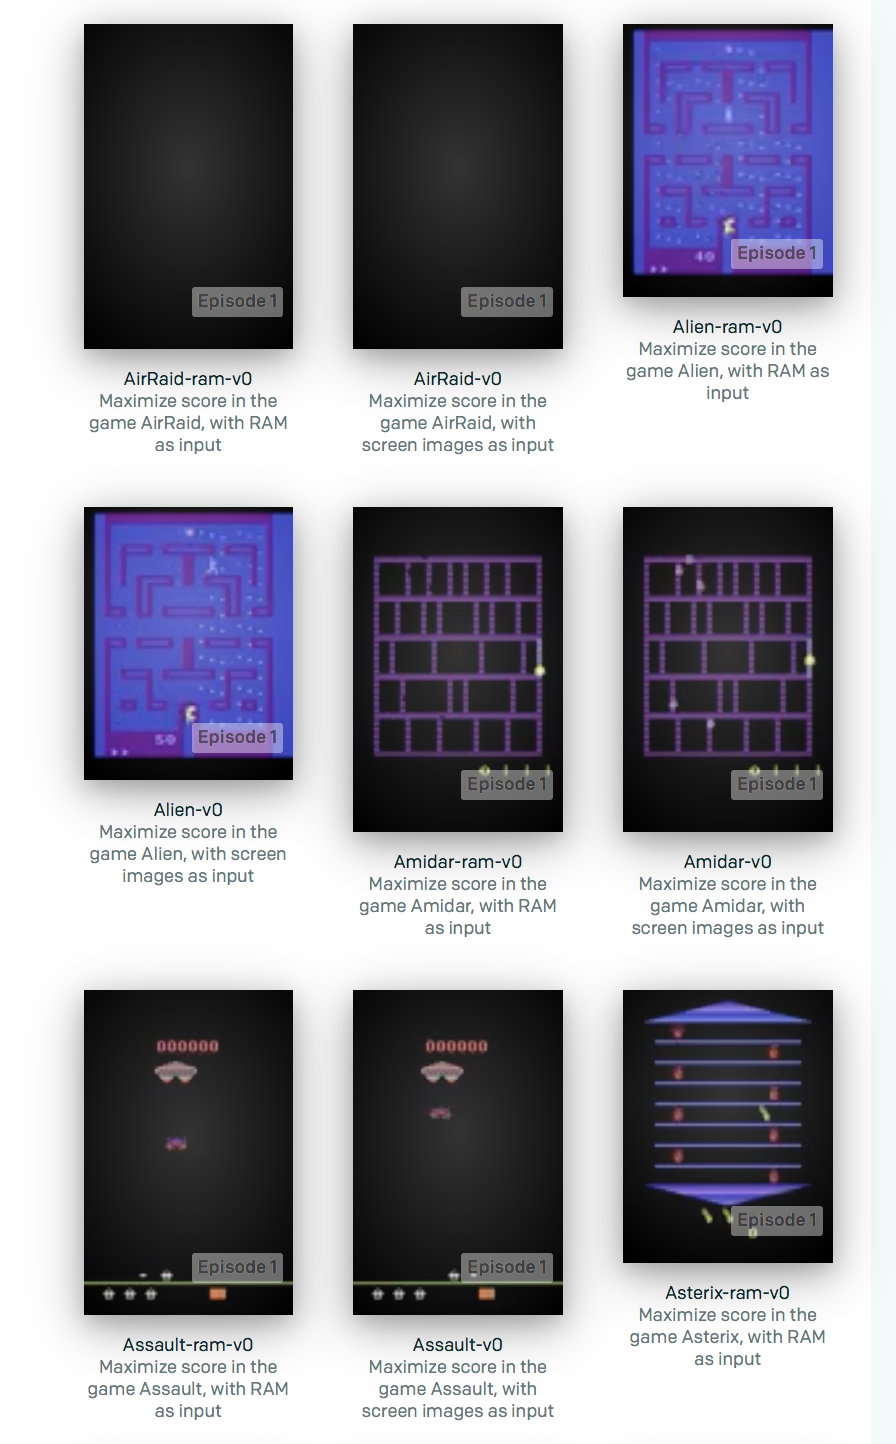

- Exceed human performance on the majority.

![AI_vs_humna](AI_v_human.png)

## However!

Around the same time Minh _et al_ are working:

- GPGPU goes mainstream (10-100X speedup in training time)
    - 100 days takes 1 day. 
    - 100 hours becomes 1 hour.
- AWS / Cloud computing

### Training times in Minh _et al_:

- 50 million frames (that is, around 38 days of game experience in total)
- Replay memory of 1 million most recent frames

# Principled learning

- A key part in developing a learning alg has been to prove its
    - Optimality (for some criterion)
    - Efficiency
    - Both
    
- _CS aim_: Ensure it will learn... the global.
- Neuroscience aim_: Use principled algs as a benchmark for humans, and other animals.
- **But!**

# Principled learning

- Nearly all principled derivations done with low $d$ systems...

# 'A reasonable intuition'

For the high $d$ problems, 
- optimal learning (e.g., Q learning),
- combined with deep function approximation should do _much_ better than 
- just _blindly and randomly_ flailing about?


# Let's get Recht!

![recht.png](recht.png)

- See also: http://www.argmin.net/2018/06/25/outsider-rl/

## **Caution!**

- These are brand new results. Be skeptical!

# Policy gradients

- You've seen value methods
  - $Q \approx \mathbb{E} R_T$ and $\pi \leftarrow Q$ where $a_i \sim \pi$

# Policy gradients

- Policy gradients combine $Q$ and $\pi$ estimation:
  - $ \pi(s, \theta) \approx \mathbb{E} R_T $ where $a_i \sim \pi(s, \theta) $

# Policy gradients

- $\pi$ can be either discrete of continuous.
  - $a \sim (0, 1)$ or $a \sim (\text{left}, \text{right})$
  - $a \sim N(\mu, \sigma)$ or $a \sim U(.)$

# Basic Recht (random) search

- Given a state $s$, set a random policy $\pi(\theta)$. Try it ($a \sim \pi(\theta)$). Go again $N$ times. Eventually, learn by:
- Random finite differences:

$$\frac{r(\pi(\theta + \nu \delta) - r(\pi(\theta − \nu \delta))}{\nu}$$

- i.e., Euler's on the error curve

# 2d error


![error](error_curve.png)

# 2d error

![error](error_perturb.png)

![BRS](BRS.png)

# Augmentin' it Recht!

1. Scale learning rate ($\alpha$) by the $\text{var}(R_t)$
2. Normalize $s$ (online)
3. Some perturbations skipped, $\delta_j \rightarrow 0$

![ARS](ARS.png)

## MuJoCo

![mujoco](mujoco.png)

# A cheetah at play

![run](cheetah.gif)

# A (half)cheetah at play


![run](hc3.gif)

![run](hc2.gif)

![run](hc1.gif)

![run](cancan.gif)

# Forget your principles?

- RL versus RS.
- Fancy, state of the art RL: 
  - TRPO, DDPG, A2C, CEM, etc

![table2](table2.png)
![table3](table3.png)

![params](params.png)

![seeds](seeds.png)

# In sum

- RL in invented in the 70's.
- Formalized, mathematically developed in the 90s. Optimal methods found.
- Researchers waiting on `f` to apply optimal methods on large state problems
- Minh _et al_ (and others!) solve $f$ with deep ANNs (among other tricks).
- But this is expensive!
- Recht shows how _maybe_ optimal RL and $f$ _were never needed_. 
- With enough computation random search is viable, perhaps better!?

# In neuroscience

- RL in invented in the 70's.
- Formalized, mathematically developed in the 90s. Optimal methods found.
- in the 90-now, develop small $d$ tasks for humans, rats, monkeys, to solve.
- Observe how animals can approach optimal in these tasks (on average!)
- Look for neural implementations of optimal solutions.
- **But** for large state tasks, and single trials, animals are often not optimal...

**So...**

- Do we keep optimal as a reference (bounded rationality)?
- Or take a lesson fron Recht?

# Discussion

Dr's V and D have focused often on using principled learning methods to describe behavior and brain activity.

Given Recht, your job today is to decide the future research program of the CoAxLab. 

Should we:
1. Continue to focus on principled approaches or
2. Start anew, focusing on random methods and/or other brute force strategies?

Two groups. Group 1 argues for 1. Group 2 argues for 2.